###Importing Modules with Preparing Dataset

In [ ]:
!pip install arabic_reshaper
!pip install stop_words
!pip install python-bidi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from bidi.algorithm import get_display
from stop_words import get_stop_words
from arabic_reshaper import arabic_reshaper

In [3]:
df = pd.read_csv('/content/Trial Arabic dataset for WordCount.csv',encoding='utf16',on_bad_lines='skip')
df.head()

,reviews\tclassify
0,اللون والخامة\t1
1,رائع\t1
2,حلوة جداً و سعرها خطير\t1
3,جميل اوي وكويس علي سعرة\t1
4,الخامه رديئه جدا\t-1


In [4]:
df = df['reviews\tclassify'].str.split('\t', n=1, expand=True)
df.head()

,0,1
0,اللون والخامة,1
1,رائع,1
2,حلوة جداً و سعرها خطير,1
3,جميل اوي وكويس علي سعرة,1
4,الخامه رديئه جدا,-1


In [5]:
df = df.rename(columns={0:'Review', 1: 'Classify'})
df["Classify"] = pd.to_numeric(df["Classify"])

In [13]:
df.head()

,Review,Classify
0,اللون والخامة,1
1,رائع,1
2,حلوة جداً و سعرها خطير,1
3,جميل اوي وكويس علي سعرة,1
4,الخامه رديئه جدا,-1


###Tokenization to Determine Most Common Words with Partial Cleaning of the Dataset

In [ ]:
nltk.download('punkt')
text_column = df.loc[0:,'Review']
list_tokens = [nltk.word_tokenize(line) for line in text_column]
print(list_tokens)

In [ ]:
word_list = []
for lst in list_tokens:
  for word in lst:
    word_list.append(word)
print(word_list)

In [ ]:
#to remove '?' and english words from the list
pt = r'[A-Za-z0-9?]'
arabic_list=[]
for word in word_list:
  cleaned_word = re.sub(pt, '', word)
  arabic_list.append(cleaned_word)

stop_points = ['.', "'", ',', "-", ''] 

print('The list after removing English words and Question marks is:', arabic_list)

cleaned_list = list(filter(lambda x: x not in stop_points, arabic_list))

print('The list after removing most characters is: ', cleaned_list)


In [ ]:
cleaned_words = nltk.FreqDist(word for word in cleaned_list)
word_features = cleaned_words.most_common(500)
print(word_features)

###Using WordCount

In [ ]:
#taking first 99 words
hundred_list = []
for i in range(100):
  hundred_list.append(word_features[i][0])
print(hundred_list)

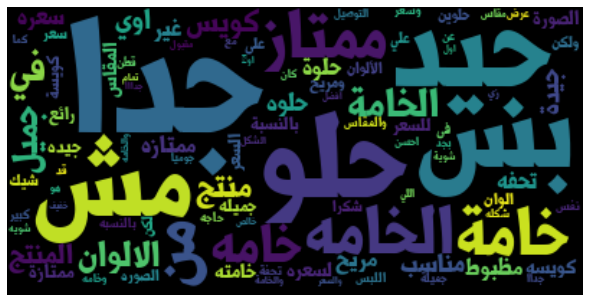

In [12]:
arabic_stop = get_stop_words('arabic')
stop_words = set(arabic_stop)
wc = WordCloud(stopwords=stop_words, font_path='/content/Shorooq_N1.ttf')
reversed_words = []
for word in hundred_list:
  text = arabic_reshaper.reshape(word)
  text = get_display(text)
  reversed_words.append(text)
pos_string = pd.Series(reversed_words).str.cat(sep=' ')
wc.generate(pos_string)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()